# ТМО Рубежный контроль №1

## Вариант: 7

### Задача №1.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

### Дополнительное задание для группы ИУ5-65Б

Для студентов группы ИУ5-65Б - для набора данных построить "парные диаграммы".

### Наборы данных:
https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict_Ver1.1.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Загрузим выборку данных
data=pd.read_csv("sample_data/Admission_Predict_Ver1.1.csv")

In [3]:
# размер набора данных
data.shape

(500, 9)

In [4]:
# типы колонок
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Проверка на наличие пропусков в данных

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Пропусков в данных не обнаружено, следовательно производить удаление столбцов ии строк не требуется

In [6]:
# Первые 5 строк датасета
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# "Парные диаграммы" 
Построим диаграммы для данного датасета

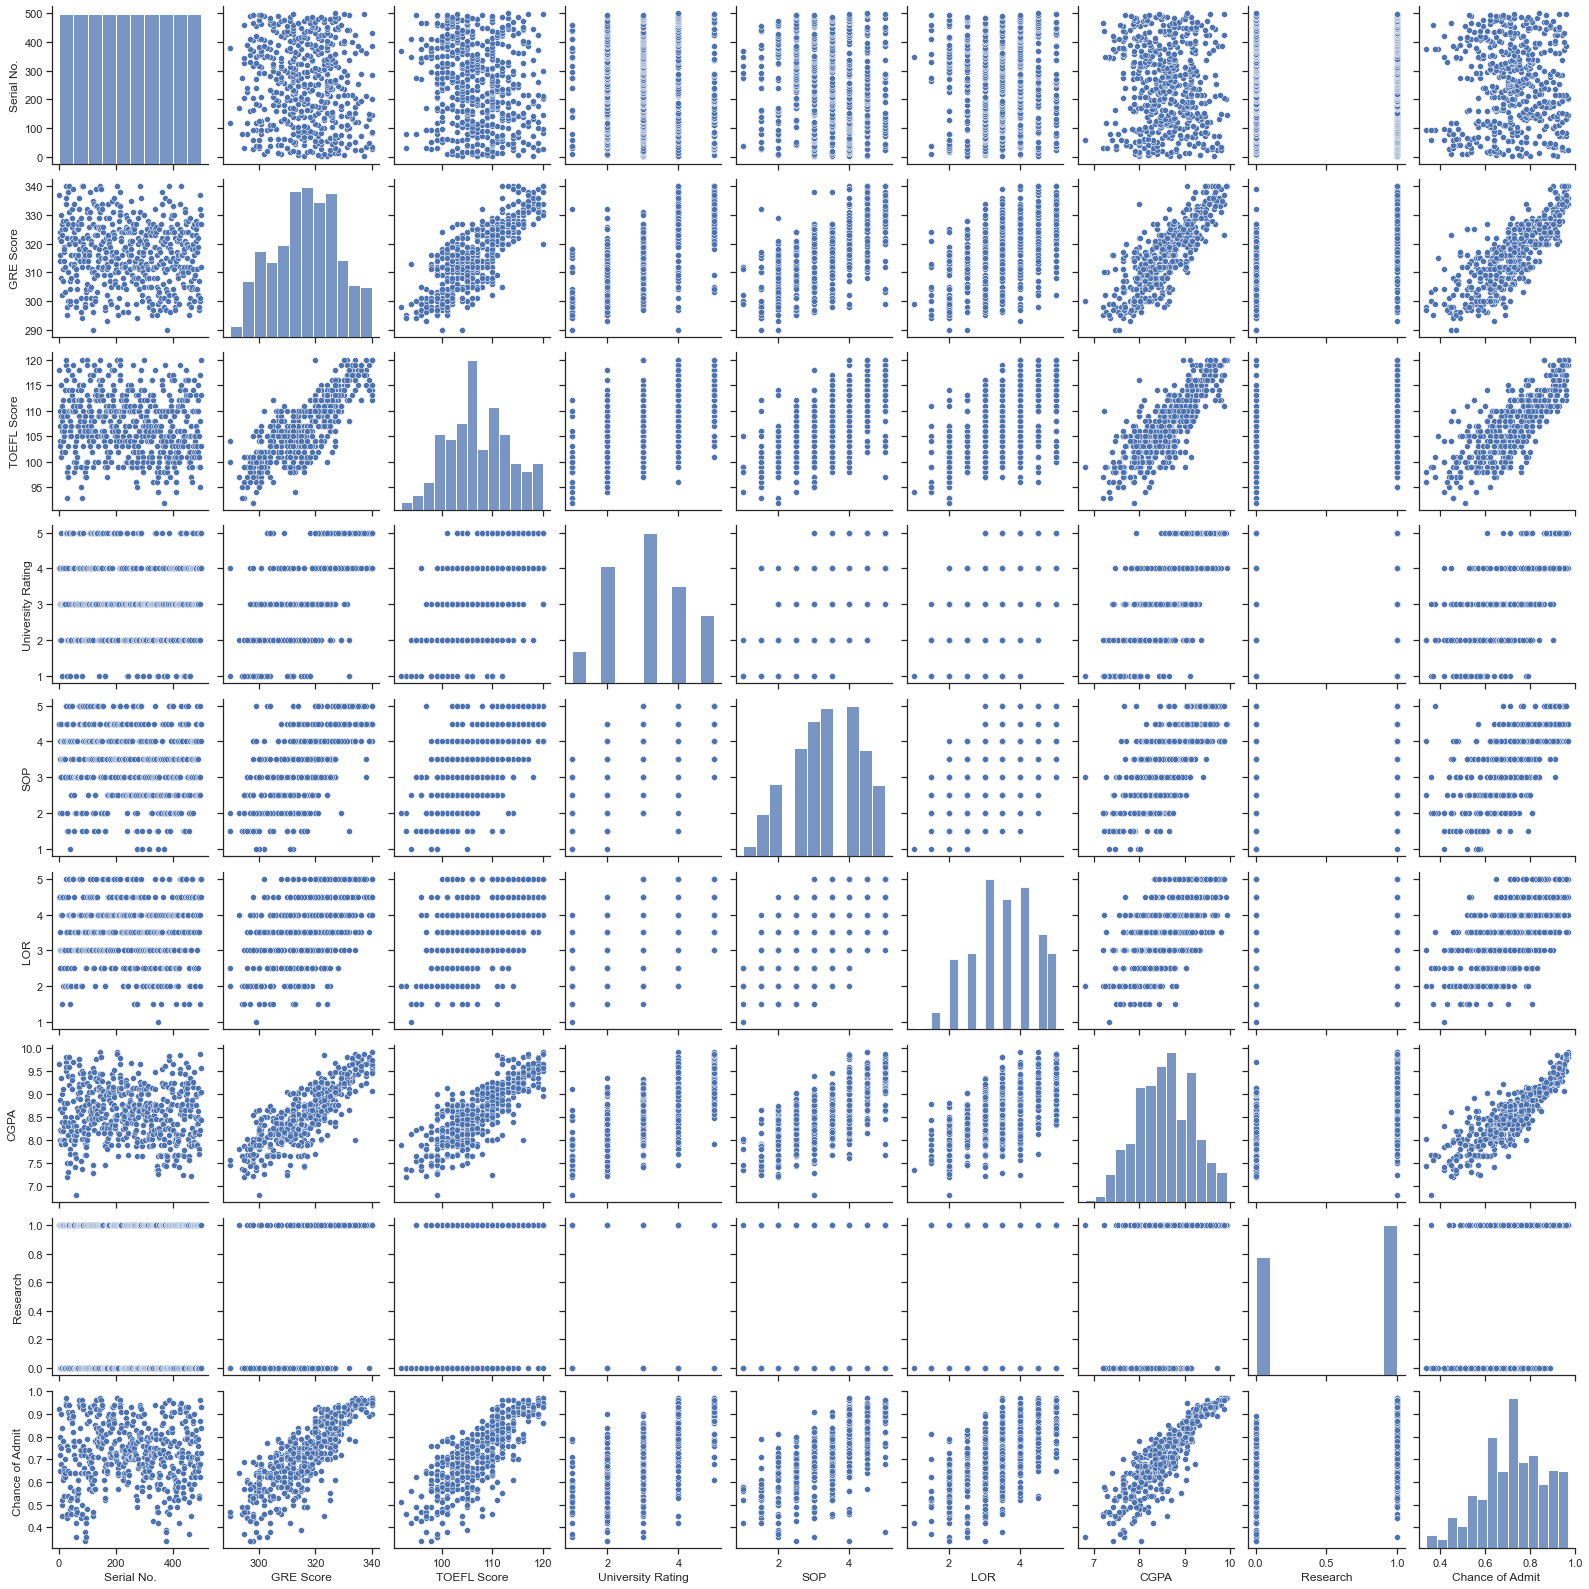

In [11]:
sns.pairplot(data)

# Корреляционный анализ

<AxesSubplot:>

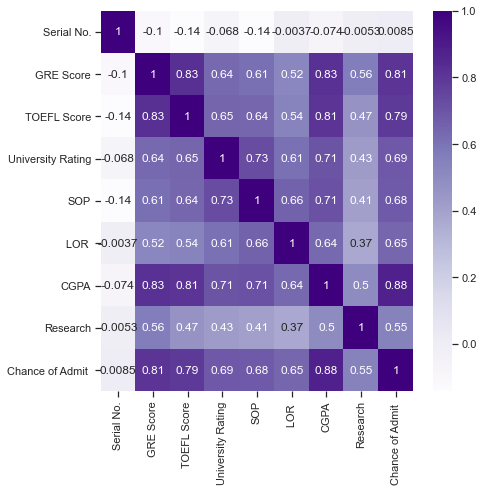

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), cmap='Purples', annot=True)


In [12]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# Выводы на основе корреляционной матрицы

- Параметр "Serial No" очень слабо коррелирует со всеми остальными параметрами.
#### Скорее всего получится построить хорошую модель машинного обучения, так как между подавляющим числом параметров корреляция порядка 0,5 и выше